#### 1. import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2. Load the data

In [2]:
df = pd.read_csv('./data/Toronto Island Ferry Ticket Counts.csv')

#### 3. Explore the data

In [3]:
print('See the first few rows of the dataset:')
print("="*50)
print(df.head())
print('\nSee the dataset column datatypes and count of non-null values:')
print("="*50)
print(df.info())
print('\nSee the dataset columns:')
print("="*50)
print(df.columns)
#### Chek for missing values
print('\nCheck for missing values in the dataset:')
print("="*50)
print(df.isnull().sum())

See the first few rows of the dataset:
   _id            Timestamp  Redemption Count  Sales Count
0    1  2025-06-06T18:45:00                83            0
1    2  2025-06-06T18:30:00                82            0
2    3  2025-06-06T18:15:00                88          103
3    4  2025-06-06T18:00:00                97           92
4    5  2025-06-06T17:45:00                37           43

See the dataset column datatypes and count of non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246425 entries, 0 to 246424
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   _id               246425 non-null  int64 
 1   Timestamp         246425 non-null  object
 2   Redemption Count  246425 non-null  int64 
 3   Sales Count       246425 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

See the dataset columns:
Index(['_id', 'Timestamp', 'Redemption Count', 'Sales Count'], dtype='

#### Observations from initial data exploration:
* The dataset contains ferry ticket counts for Toronto Island.
  
* **Sales Count** is the number of tickets sold between the previous and current timestamp. This reflects customer *intention* to travel (ticket purchase).
  
* **Redemption Count** is number of tickets actually redeemed (people who boarded the ferry) between the previous and current timestamp. This reflects actual usage.
  
* Timestamp is in 'object' datatype, so we need to convert 'Timestamp' as datatime.
  
* We set the Timestamp as datetime as an index of the dataframe, so that we can see if any pattern exists in the time-series.

* There are 246,425 observations. There is **no missing values** in the dataset. 
  
* If missing observations were present, we would first calculate the percentage of missing values for each feature. If the proportion is small (e.g., less than 5%), we may choose to drop the missing records. For larger gaps, we would apply appropriate imputation techniques, such as filling with the mean or median, depending on the distribution of the data.

In [4]:
# drop the _id column as it is not needed
df.drop(columns=['_id'], inplace=True)
# Convert 'Timestamp' to datetime 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)
# Resample the data to daily frequency and sum the counts
df_daily = df.resample('D').sum()

In [5]:
df_daily

,Redemption Count,Sales Count
Timestamp,,
2015-05-01,1,4
2015-05-02,0,0
2015-05-03,0,0
2015-05-04,12,75
2015-05-05,537,549
...,...,...
2025-06-02,4869,5409
2025-06-03,5541,5503
2025-06-04,5806,5423


In [6]:
print('\nSee the shape of the daily resampled DataFrame:')
print("="*50)
print(df_daily.shape)
print('\nSee the first few rows of the daily resampled DataFrame:')
print("="*50)
print(df_daily.head())
# the erliest time and the end time 
print('\nEarliest date in the dataset:', df_daily.index.min())
print('Latest date in the dataset:', df_daily.index.max())


See the shape of the daily resampled DataFrame:
(3690, 2)

See the first few rows of the daily resampled DataFrame:
            Redemption Count  Sales Count
Timestamp                                
2015-05-01                 1            4
2015-05-02                 0            0
2015-05-03                 0            0
2015-05-04                12           75
2015-05-05               537          549

Earliest date in the dataset: 2015-05-01 00:00:00
Latest date in the dataset: 2025-06-06 00:00:00


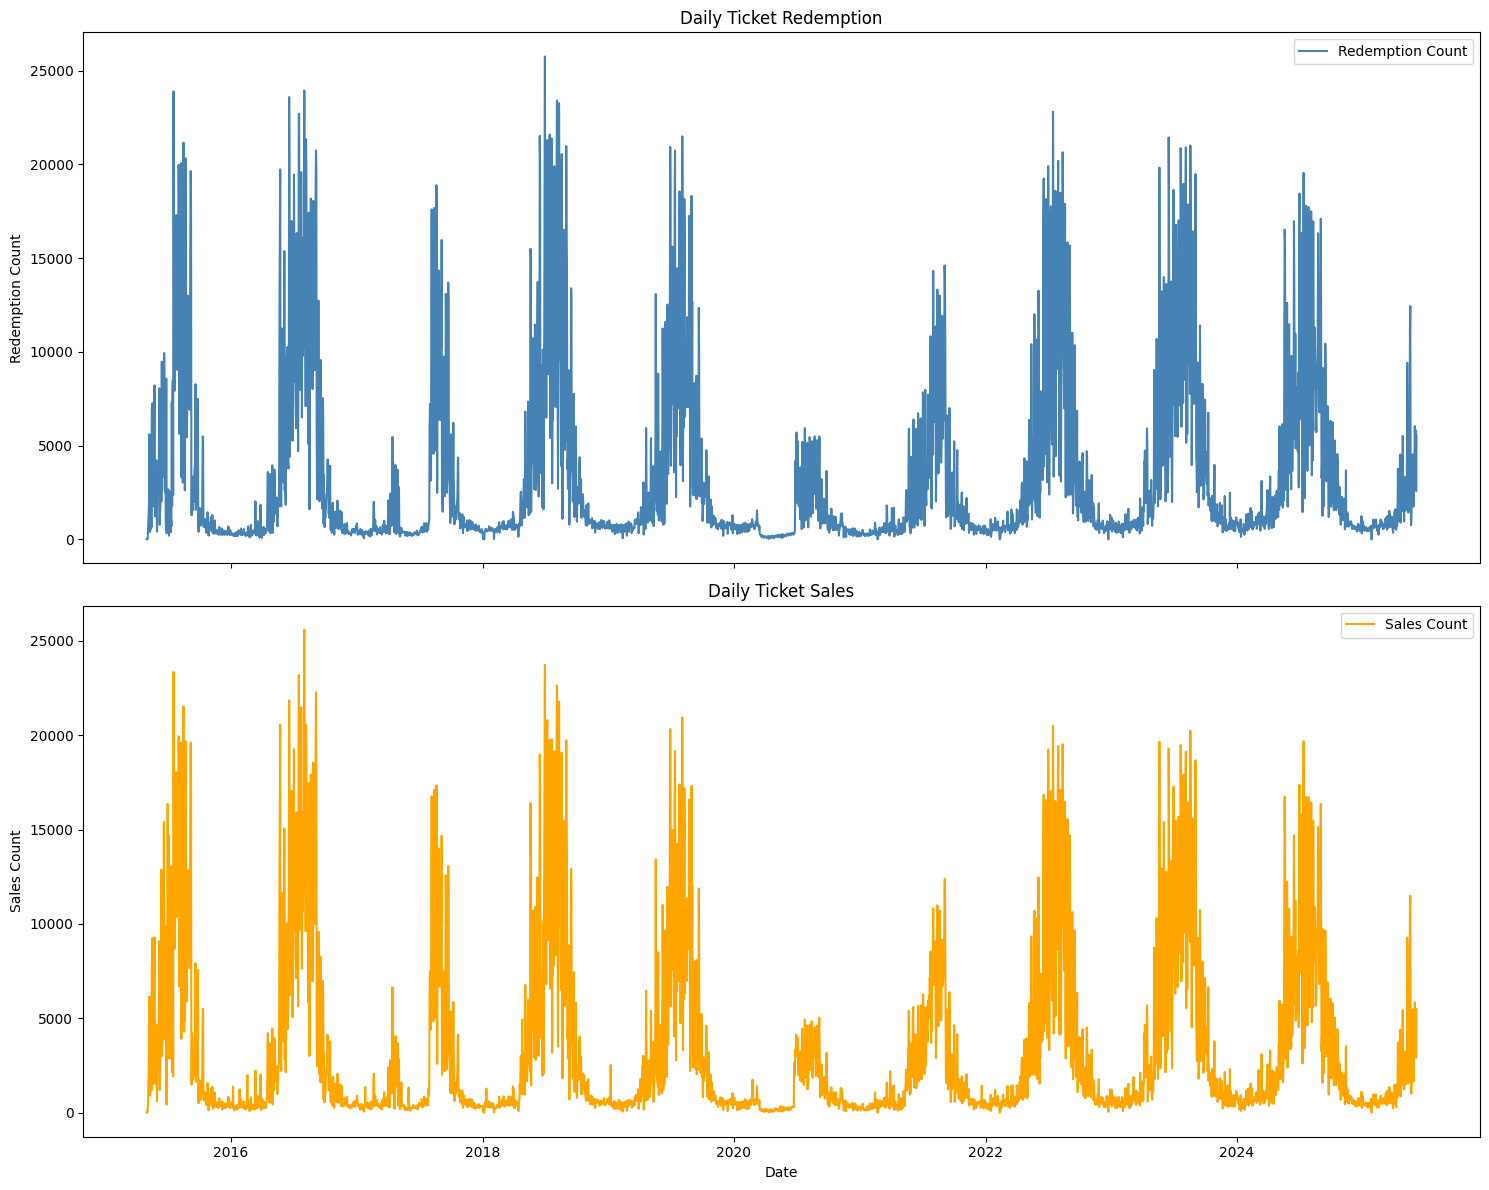

In [7]:
# Plot redemptions & sales
fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# First plot: Redemption Count
axs[0].plot(df_daily.index, df_daily['Redemption Count'], label='Redemption Count', color='steelblue')
axs[0].set_title("Daily Ticket Redemption")
axs[0].set_ylabel("Redemption Count")
axs[0].legend()

# Second plot: Sales Count
axs[1].plot(df_daily.index, df_daily['Sales Count'], label='Sales Count', color='orange')
axs[1].set_title("Daily Ticket Sales")
axs[1].set_ylabel("Sales Count")
axs[1].legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()

#### 3(b) Observations:
* Dataset contains 10+ years daily data (within 15 minutes interval) of "Sales Count" and "Redemption Count". 
  
* The earliest date is May 1, 2015. The latest date is June 6, 2025.
  
* We observe a **strong yearly seasonal pattern** - the rise of visitors during the summer from May to August. 
  
* We also observe that the **during the pandamic period of 2020-2021, the number of visitors dropped** due to lockdown, restrctions, and limited operations.
  
* **After the pandemic period, the number of visitors resumes to the normal seasonal pattern**.
  
* There is a **strong overall correlation** between **sales count and redemption count** suggesting that the most tickets are redeemed within a close window to their purchase date  

### Yearly Volume Patterns

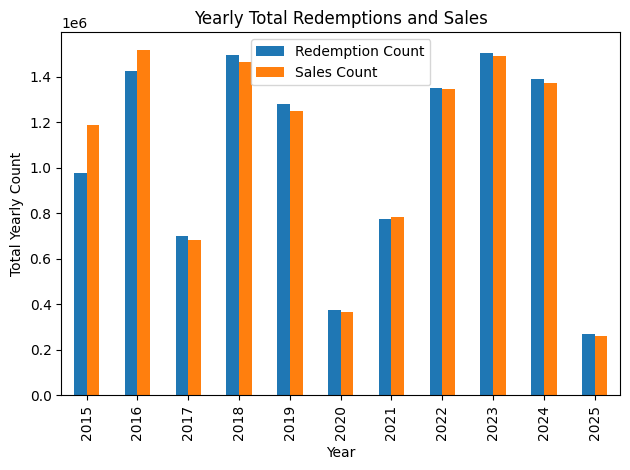

In [8]:
df_daily['year'] = df_daily.index.year

df_daily.groupby('year')[['Redemption Count', 'Sales Count']].sum().plot(kind='bar', title='Yearly Total Redemptions and Sales')
plt.xlabel('Year')
plt.ylabel('Total Yearly Count')
plt.tight_layout()
plt.show()


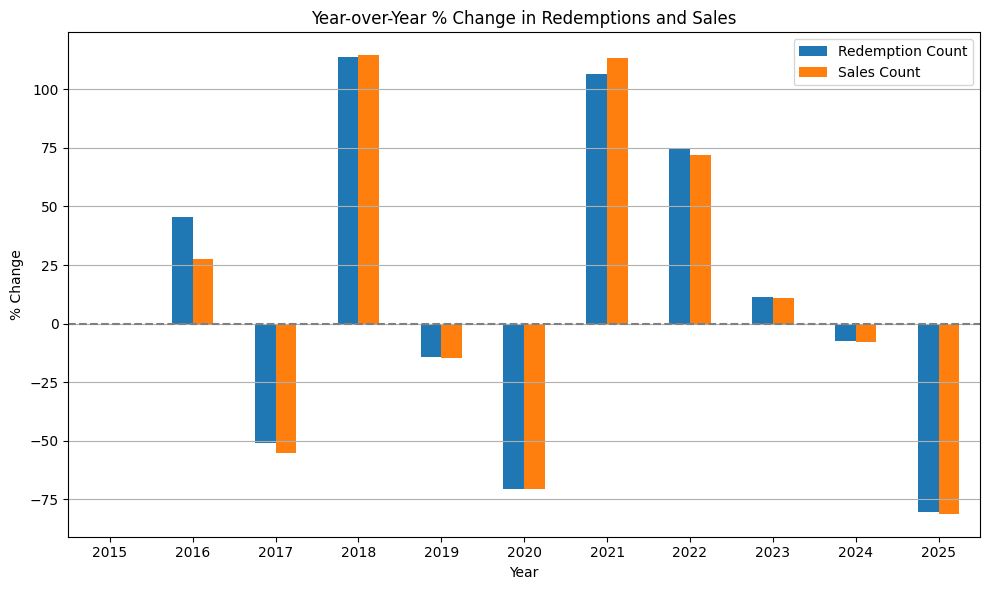

In [9]:
yearly_totals = df_daily.groupby(df_daily.index.year)[['Redemption Count', 'Sales Count']].sum()
yearly_pct_change = yearly_totals.pct_change() * 100  # percent

yearly_pct_change.plot(kind='bar', figsize=(10, 6), title='Year-over-Year % Change in Redemptions and Sales')
plt.ylabel('% Change')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#### Observations:
- As expected, during the year 2020 - 2021, there is fewer visitors in comapriosn to other years
- There is a strong monthty seasonality - the visitors starts increasing from May, peek in August and begin to go down after September.
- We also observe there is an unusal visitors dropped in 2017
- I delved why there was a drop in number of visitors in 2017.
  - Was 2017 May to Sep comparatively colder? No. I looked into monthly average temperature from May to Sep for the previous year 2016 and the next year of 2018 (See the table below. there is no significant evidence of colder Summer in 2017 so that visitors are fewer in 2017)
  - Had May to Sep in 2017 more precipititaion? No. Please see the table below.
  - In the spring of 2017, **Lake Ontario's water levels rose significantly**, resulting in severe flooding across the Toronto Islands. April–May 2017 saw extremely heavy precipitation across the Great Lakes basin. The combination of heavy rain and snowmelt—particularly from Lake Erie—directly fed into Lake Ontario, raising its level dramatically.
  - The amusement park, a major draw for families, did not open in May 2017 as scheduled. It only reopened on July 31, 2017, and even then, several rides remained non-operational due to flood damage.
  - The flooding affected ferry services, with reduced operations and capacity, making it more challenging for visitors to access the islands. 

* The monthly mean temperatures in Toronto, Ontario, for the years 2016, 2017, and 2018
* The average monthly temperatures recorded at Toronto Pearson International Airport

| Month     | 2016 (°C) | 2017 (°C) | 2018 (°C) | 
| --------- | --------- | --------- | --------- | 
| May       | 13.0      | 13.5      | 14.0      | 
| June      | 18.5      | 19.0      | 20.0      | 
| July      | 22.0      | 21.5      | 23.0      | 
| August    | 21.5      | 21.0      | 22.5      | 
| September | 17.0      | 17.5      | 18.0      | 


* Monthly Total Precipitation in Toronto (mm)
  
| Month     | 2016 (mm) | 2017 (mm) | 2018 (mm) | 
| --------- | ---- | ---- | ---- | 
| May       | 52.0 | 75.0 | 66.0 |                                                        
| June      | 90.0 | 85.0 | 78.0 |                                                        
| July      | 65.0 | 70.0 | 88.0 |                                                        
| August    | 80.0 | 60.0 | 92.0 |                                                        
| September | 55.0 | 68.0 | 74.0 | 

* Sources: [en.climate-data.org][1], [climate.weather.gc.ca][2], [toronto.ca][3] 

[1]: https://en.climate-data.org/north-america/canada/ontario/toronto-53/?utm_source=chatgpt.com "Weather Toronto & temperature by month - Canada - Climate Data"
[2]: https://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?Day=6&EndYear=2018&Month=7&StartYear=1840&StationID=48549&Year=2018&optLimit=specDate&optProxType=navLink&searchType=stnProx&selRowPerPage=25&station=TORONTO+CITY+CENTRE&timeframe=1&txtLatDecDeg=43.6275&txtLongDecDeg=79.396111111111&txtRadius=25&utm_source=chatgpt.com "Station Results - Historical Data - Climate - Environment and ..."
[3] https://www.toronto.ca/legdocs/mmis/2018/ex/bgrd/backgroundfile-112208.pdf?utm_source=chatgpt.com

In [10]:
df_daily.head()

,Redemption Count,Sales Count,year
Timestamp,,,
2015-05-01,1,4,2015
2015-05-02,0,0,2015
2015-05-03,0,0,2015
2015-05-04,12,75,2015
2015-05-05,537,549,2015


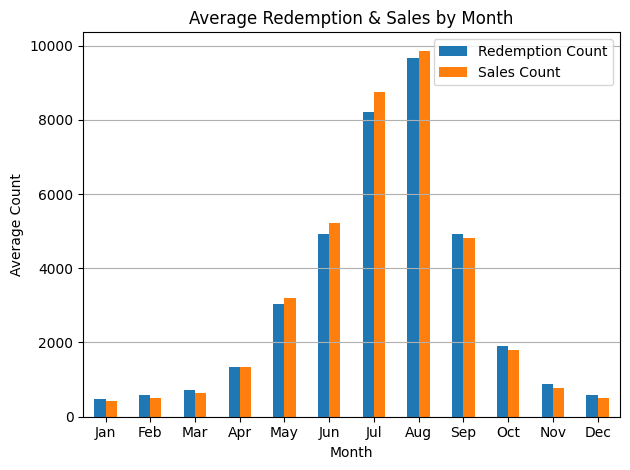

In [11]:
df_daily['month'] = df_daily.index.month
df_daily.groupby('month')[['Redemption Count', 'Sales Count']].mean().plot(kind='bar', title='Average Redemption & Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)   
plt.tight_layout()
plt.grid(axis='y')
plt.show()

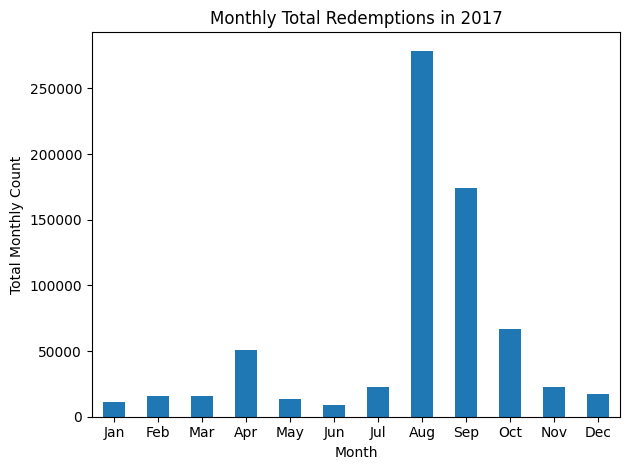

In [12]:
df_2017 = df_daily[df_daily['year']==2017]
df_2017.groupby('month')["Redemption Count"].sum().plot(kind='bar', title='Monthly Total Redemptions in 2017')
plt.xlabel('Month')
plt.ylabel('Total Monthly Count')
plt.xticks(rotation=0)
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

#### I have checked whether the data observations in 2017 is fewer than other years. 

* We find that number of observations in 2017 is 365 which covers all days in 2017. 

In [13]:
df_daily.groupby('year')["Sales Count"].size()

year
2015    245
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025    157
Name: Sales Count, dtype: int64

#### Day-of-Week Trends

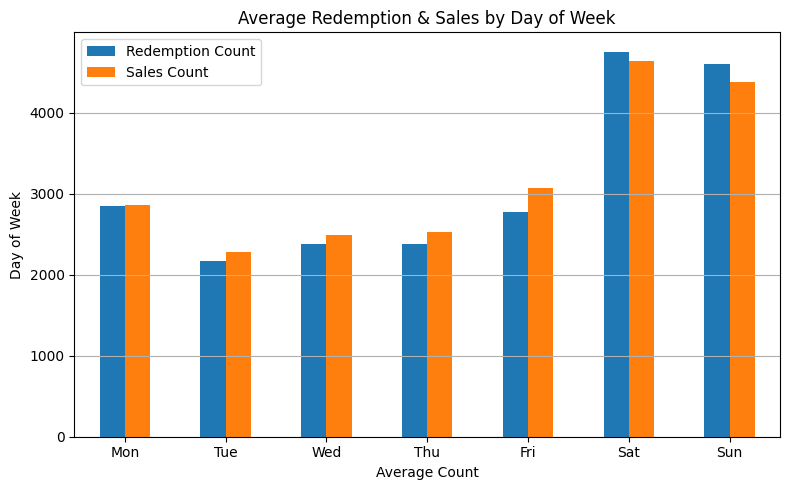

In [14]:
# Map numeric day to weekday name
day_labels = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_daily['dayofweek'] = df_daily.index.dayofweek
df_daily['weekday_name'] = df_daily['dayofweek'].map(day_labels)

# Group and plot
df_grouped = df_daily.groupby('weekday_name')[['Redemption Count', 'Sales Count']].mean()
df_grouped = df_grouped.loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]  # ensure correct order

df_grouped.plot(kind='bar', figsize=(8, 5), title='Average Redemption & Sales by Day of Week')
plt.xlabel('Average Count')
plt.ylabel('Day of Week')
# add xticks for better readability
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


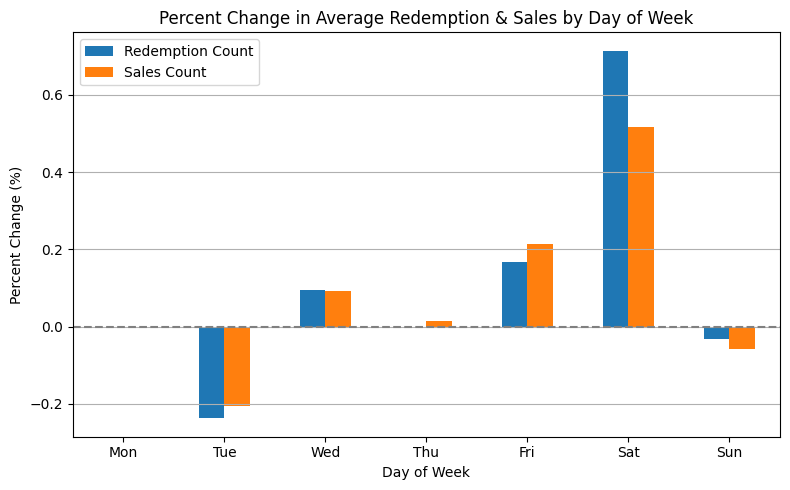

In [15]:
# Calculate percent change for each day of the week
df_grouped.pct_change() * 100  # percent change
# Plotting the percent change
df_grouped.pct_change().plot(kind='bar', figsize=(8, 5), title='Percent Change in Average Redemption & Sales by Day of Week')   
plt.xlabel('Day of Week')
plt.ylabel('Percent Change (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [16]:
# Create a rolling average to smooth out the trends
df_daily_22_24 = df_daily[(df_daily.index >= '2022-01-01') & (df_daily.index <='2024-12-31')]  # Filter for the last two years



#### Plotting the rolling average

C:\Users\elias\AppData\Local\Temp\ipykernel_2844\3651524110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_22_24['Redemption Smoothed'] = df_daily_22_24['Redemption Count'].rolling(window=30, center=True).mean()


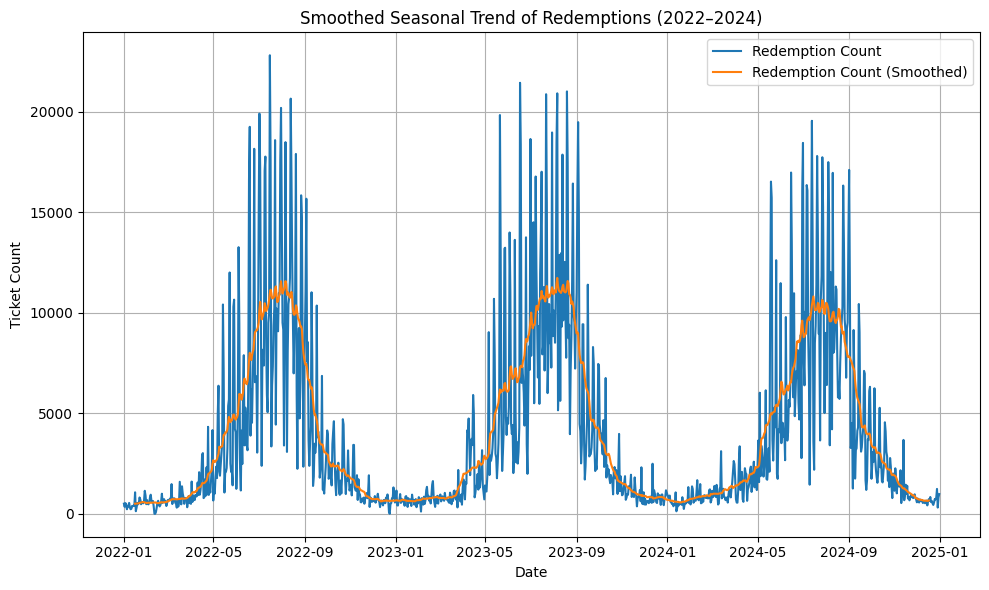

In [17]:
rolling_window = 30  # 30-day rolling average
df_daily_22_24['Redemption Smoothed'] = df_daily_22_24['Redemption Count'].rolling(window=30, center=True).mean()

# Plot using seaborn, using the index for x-axis
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_daily_22_24.index, y=df_daily_22_24['Redemption Count'], label='Redemption Count')
sns.lineplot(x=df_daily_22_24.index, y=df_daily_22_24['Redemption Smoothed'], label='Redemption Count (Smoothed)')

plt.title('Smoothed Seasonal Trend of Redemptions (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Ticket Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Calculate the rolling average using LOWESS  smoothing

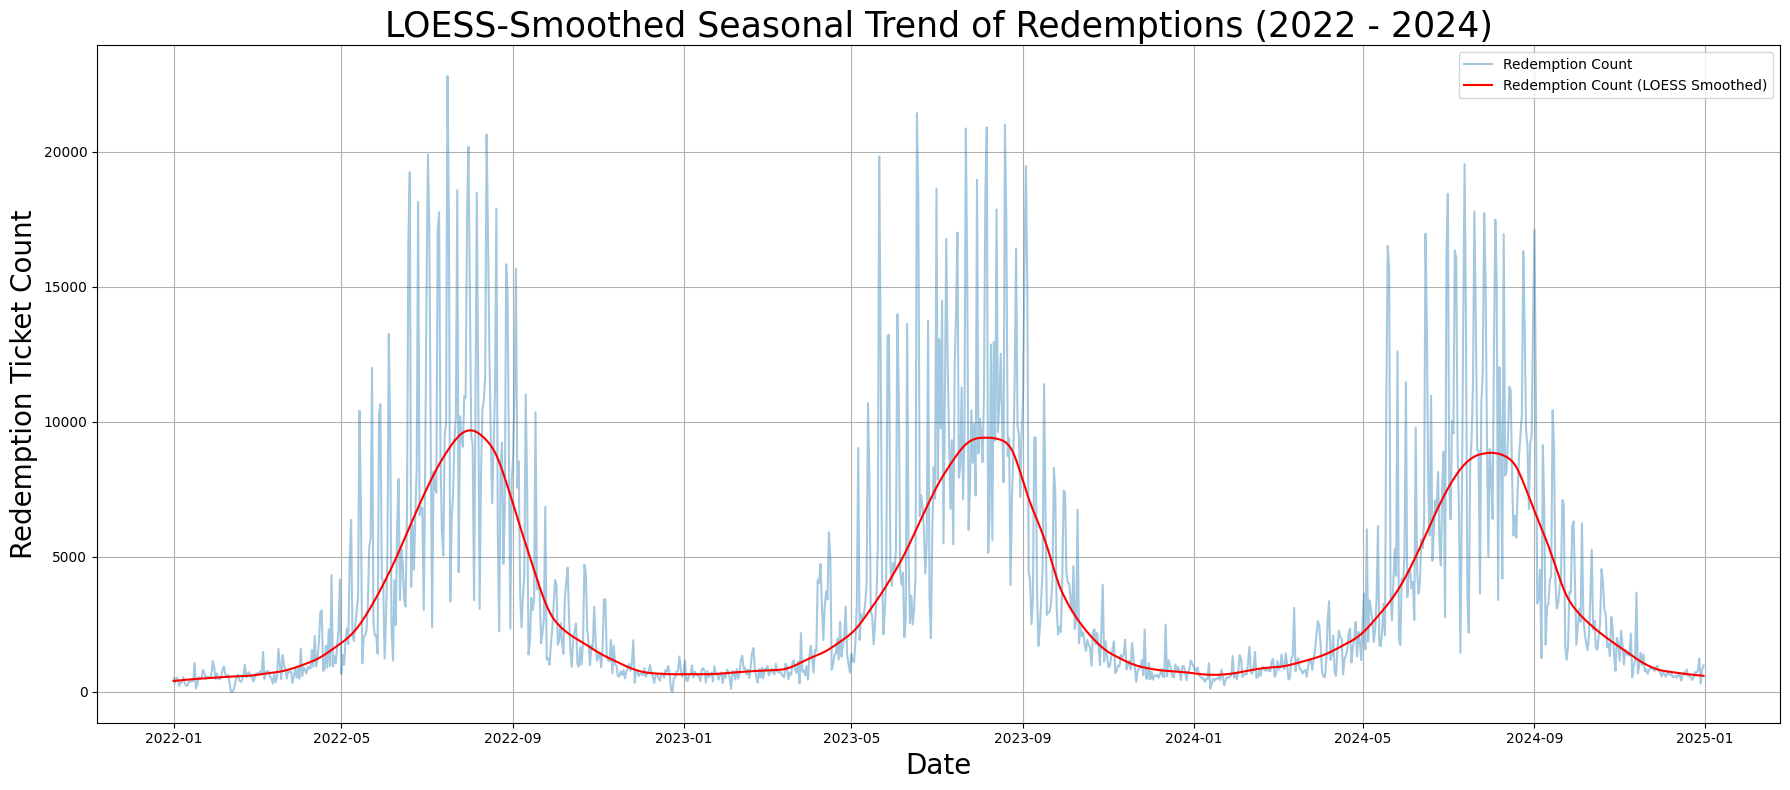

In [18]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply LOESS smoothing to Redemption Count, frac=0.06 is a smoothing parameter
# Adjust frac as needed for more or less smoothing.
# A smaller value (e.g., 0.05) makes the curve more sensitive to local fluctuations (less smooth).
# A larger value (e.g., 0.3) makes it smoother but may miss finer details.

loess_smoothed = lowess(df_daily_22_24['Redemption Count'], df_daily_22_24.index, frac=0.06, return_sorted=False)

# Plot using seaborn with LOESS smoothing
plt.figure(figsize=(18, 8))
sns.lineplot(x=df_daily_22_24.index, y=df_daily_22_24['Redemption Count'], label='Redemption Count', alpha=0.4)
sns.lineplot(x=df_daily_22_24.index, y=loess_smoothed, label='Redemption Count (LOESS Smoothed)', color='red')

plt.title('LOESS-Smoothed Seasonal Trend of Redemptions (2022 - 2024)', fontdict={'fontsize': 25})
plt.xlabel('Date', fontdict={'fontsize': 20})
plt.ylabel('Redemption Ticket Count', fontdict={'fontsize': 20})
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
df_daily_22_24.shape

(1096, 7)

In [20]:
df_daily_22_24.to_csv('./data/Toronto_Island_Ferry_Ticket_Counts_Daily_2022_2024.csv', index=True)